# Классификация текстов с использованием Наивного Байесовского Классификатора

In [144]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn. model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Задание 1 (1 балл)

Откройте данные. Узнайте, сколько в них спам- и не спам-писем. Визуализируйте полученные соотношение подходящим образом.

In [145]:
# Открываем данные
df = pd.read_csv('spam_or_not_spam.csv')
df.head()


,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0


In [146]:
# Рассчитайтываем частоты для классов
df['label'].value_counts()

0    2500
1     500
Name: label, dtype: int64

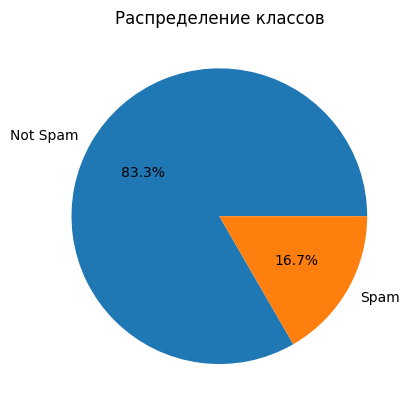

In [147]:
# визуализируем результат
vals = df['label'].value_counts()
labels = ["Not Spam", "Spam"]

plt.pie(vals, labels=labels, autopct='%1.1f%%')
plt.title("Распределение классов")
plt.show()

## Задание 2 (2 балла)

Вам необходимо предобработать ваши данные и перевести их в векторный вид. Подгрузим необходимый модуль:

In [148]:
from sklearn.feature_extraction.text import CountVectorizer

Замените в данных все пустые строки и строки, состоящие из пробелов, на пропуски (NaN). После этого удалите из данных все строки, в которых наблюдаются пропущенные значения.

In [149]:
# Заменяем строки на (NaN) и удаляем
df.replace(['', ' '], np.nan, inplace=True)
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2997 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   2997 non-null   object
 1   label   2997 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 70.2+ KB


Переводим данные в векторный вид:

In [150]:
# Переводим данные в векторный вид
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df["email"])

Определите, сколько теперь признаков в нашем наборе данных:

In [151]:
# Определяем, сколько признаков в наборе данных
X.shape[1]

34116

## Задание 3 (2 балла)

Определите целевую переменную и признаки:

In [152]:
# Определяем целевую переменную
y = df['label']

Разделите выборку на обучающую и тестовую, используя стратифицированное разбиение (параметр `stratify` установите в значение вектора ответов y) размер тестовой выборки (`test_size`) возьмите как 0.25, параметр `random_state` определите со значением 42:

In [153]:
# Разбиваем выборку на обучающую и тестовую
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)
# выводим результат
print(f'Размер обучающей выборки: {X_train.shape}')
print(f'Размер тестовой выборки: {X_test.shape}')

Размер обучающей выборки: (2247, 34116)
Размер тестовой выборки: (750, 34116)


Рассчитайте среднее значение целевой переменной по тестовой выборке:

In [154]:
# Среднее значение целевой переменной
round(y_test.mean(), 3)

0.165

## Задание 4 (3 балла)

Определите и обучите подходящий алгоритм с параметром alpha = 0.01

In [155]:
# Создаем объект классификатора
clf = MultinomialNB(alpha=0.01)
# Обучаем классификатор
clf.fit(X_train, y_train)

MultinomialNB(alpha=0.01)

Оцените результат с точки зрения всех известных вам метрик (не менее трёх):

In [156]:
# Вычисляем accuracy
y_test_pred = clf.predict(X_test)
print(f"Accuracy: {round(accuracy_score(y_test, y_test_pred), 3)}")
print(f"f1: {round(f1_score(y_test, y_test_pred), 3)}")
print(f"Recall: {round(recall_score(y_test, y_test_pred), 3)}")
print(f"Precision: {precision_score(y_test, y_test_pred)}")

Accuracy: 0.987
f1: 0.958
Recall: 0.919
Precision: 1.0


Нарисуйте ROC-кривую:

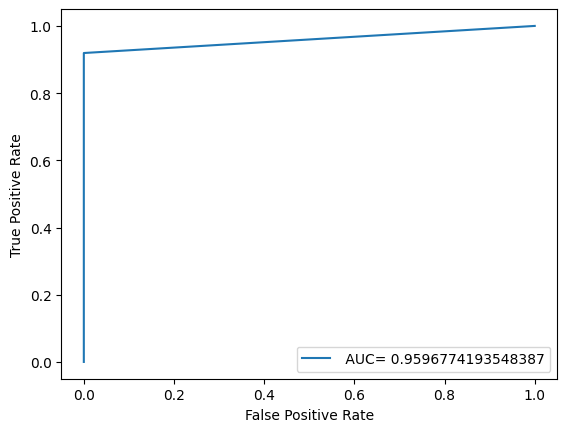

In [157]:
# Вычислим метрики
fpr, tpr, _ = metrics. roc_curve (y_test, y_test_pred)
auc = metrics. roc_auc_score (y_test, y_test_pred)
# Создадим ROC кривую
plt.plot (fpr,tpr,label=" AUC= "+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show() 

## Задание 5 (3 балла)

Переберите несколько значений alpha с помощью кросс-валидации. Оцените, зависит ли от этого параметра качество классификации.

In [158]:
# Создаем GridSearchCV и передаём модель
grid_search = GridSearchCV(
    estimator=MultinomialNB(),
    param_grid={'alpha': np.arange(0.01, 10, 0.05)},
    cv=5,
)
%time grid_search.fit(X_train,y_train)
# Выводим наилучшее значение параметра alpha и соответствующее ему качество классификации
print('Наилучшее значение параметров:{}'.format(grid_search.best_params_))
print('accuracy на тестовом наборе: {:.2f}'.format(grid_search.score(X_test, y_test)))
y_test_pred = grid_search.predict(X_test)
print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))

CPU times: total: 1.38 s
Wall time: 5.77 s
Наилучшее значение параметров:{'alpha': 0.11}
accuracy на тестовом наборе: 0.99
f1_score на тестовом наборе: 0.98
